## Exercise 7: Directed Networks


Today we will analyze a directed social network of university students from Australia living in dormitory. Students were asked to name their friends in the dormitory.

__Reference:__
L. C. Freeman, C. M. Webster and D. M. Kirke (1998) "Exploring social structure using dynamic three-dimensional color images." Social Networks 20, 109-118

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
adj=np.loadtxt('australian_adj_mat.csv', delimiter=",", skiprows=1)
G=nx.from_numpy_matrix(adj,create_using=nx.DiGraph)

In [3]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 217
Number of edges: 2672
Average in degree:  12.3134
Average out degree:  12.3134


## Task 1: Reciprocity

__a)__ Calculate the reciprocity using networkx, then test its statistical significance in the following way:
1. Write a rewiring function that takes a networkx graph, randomly selects two edges, and swaps them: if A->B and C->D are selected, the graph should be modified to have the edges A->D and C->B.
2. Make a 100 copies of your graph. In each of these graphs, call your rewiring function 1,000 times. Calculate the reciprocity of each the resulting rewired networks, and store it in a list.
3. Calculate the Z-score of the observed reciprocity 
4. Plot a histogram of the randomized reciprocities and add a vertical line at the observed reciprocity.

In [4]:
observed_reciprocity = nx.reciprocity(G)
print(observed_reciprocity)

0.6235029940119761


In [5]:
def swap(graph):
    e1, e2=random.sample(graph.edges(),2)
    A,B = e1
    C,D = e2
    graph.remove_edges_from([e1,e2])
    graph.add_edges_from([(A,D),(C,B)])
    return graph

In [6]:
randomized_graphs = []
randomized_reciprocities = []

for _ in range(100):
    R = G.copy()
    for rewire in range(1000):
        R=swap(R)
    randomized_graphs.append(R)
    randomized_reciprocities.append(nx.reciprocity(R))

In [7]:
z = (observed_reciprocity - np.mean(randomized_reciprocities))/\
            (np.std(randomized_reciprocities))
z

51.22295148418418

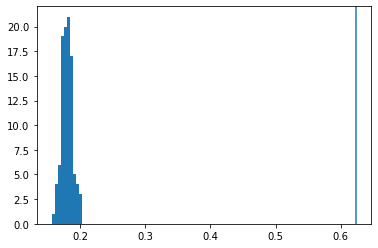

In [8]:
plt.hist(randomized_reciprocities)
plt.axvline(observed_reciprocity)

__b)__ Make an experiment to test how many edge swaps are needed to really randomize the graph. You can test this by calculating the reciprocity after every 100 swaps and observing when the reciprocity converges to a certain range.

Text(0, 0.5, 'Reciprocity')

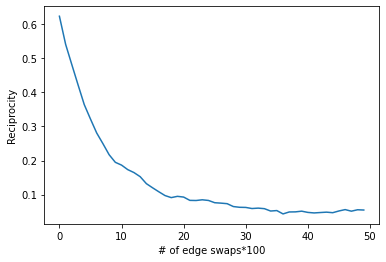

In [9]:
R = G.copy()
reciprocities = []
for _ in range(5000):
    if _ % 100 == 0:
        reciprocities.append(nx.reciprocity(R))
    R=swap(R)
plt.plot(reciprocities)
plt.xlabel('# of edge swaps*100')
plt.ylabel('Reciprocity')

## Task 2: Triadic Census

__a)__ Use networkx's implementation to carry out a tradic census of the given graph. 

#### Motif definitions
![Motifs](census.png)

In [10]:
observed_triads=nx.triadic_census(G) 
motifs = list(observed_triads.keys())

In [11]:
observed_triads

{'003': 1316425,
 '012': 181266,
 '102': 153288,
 '021D': 3324,
 '021U': 2647,
 '021C': 3006,
 '111D': 6017,
 '111U': 6120,
 '030T': 391,
 '030C': 5,
 '201': 3858,
 '120D': 550,
 '120U': 399,
 '120C': 275,
 '210': 1297,
 '300': 712}

__b)__ Reuse the 1000 randomizations of the network from task 1a) and carry out a triadic census on each of these. Afterwards, generate z-scores for each motif. Which are the over and under represented motifs in our given graph?

In [12]:
randomized_censuses = {motif:[] for motif in motifs}

for R in randomized_graphs:
    randomized_census=nx.triadic_census(R)
    for motif in motifs:
        randomized_censuses[motif].append(randomized_census[motif])

In [13]:
z_scores ={}
for motif in motifs:
    z_scores[motif]=round(
        (observed_triads[motif]-np.mean(randomized_censuses[motif]))/\
            np.std(randomized_censuses[motif]),3)

In [15]:
sorted(z_scores.items(),key=lambda x: x[1])

[('012', -46.633),
 ('021C', -32.349),
 ('021U', -30.071),
 ('021D', -24.521),
 ('030C', -13.631),
 ('030T', -13.528),
 ('120C', -3.47),
 ('111D', 11.598),
 ('111U', 12.251),
 ('120U', 13.045),
 ('120D', 22.533),
 ('003', 27.493),
 ('102', 59.096),
 ('210', 64.98),
 ('201', 67.419),
 ('300', 203.617)]

## Task 3: Flow Hierarchy

Calculate the flow hierarchy using networkx and, once again, compute its corresponding z-score based on the 100 randomizations from task 1). Is there is a hierarchy in the social network?

In [16]:
observed_hierarchy = nx.flow_hierarchy(G)
print(observed_hierarchy)

0.0052395209580838875


In [17]:
randomized_hierarchies = []

for R in randomized_graphs:
    randomized_hierarchies.append(nx.flow_hierarchy(R))
    
z = (observed_hierarchy - np.mean(randomized_hierarchies))/(np.std(randomized_hierarchies))
print(z)

-0.5354272179917264
